In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading data

In [2]:
data=pd.read_excel("Exercise Data.xlsx")
data.head(10)

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400
5,6,2000,42000,2500,39500,320
6,7,2000,43000,2500,40500,280
7,8,2000,44000,2500,41500,240
8,9,2000,40000,2500,37500,400
9,10,2000,42000,2500,39500,320


In [3]:
data.describe()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
count,25.000000,25.0,25.000000,25.0,25.000000,25.000000
mean,13.000000,2000.0,43800.000000,2500.0,41300.000000,248.000000
std,7.359801,0.0,2857.738033,0.0,2857.738033,114.309521
min,1.000000,2000.0,40000.000000,2500.0,37500.000000,0.000000
25%,7.000000,2000.0,42000.000000,2500.0,39500.000000,200.000000
50%,13.000000,2000.0,43000.000000,2500.0,40500.000000,280.000000
75%,19.000000,2000.0,45000.000000,2500.0,42500.000000,320.000000
max,25.000000,2000.0,50000.000000,2500.0,47500.000000,400.000000


In [4]:
data.shape

(25, 6)

## Dropping column because it's not important in this calculation

In [5]:
data.drop(['Chit fund organizer commission'], axis=1)

,Month,Contribution,Amount won by the bidder,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,37500,400
1,2,2000,42000,39500,320
2,3,2000,45000,42500,200
3,4,2000,48000,45500,80
4,5,2000,40000,37500,400
5,6,2000,42000,39500,320
6,7,2000,43000,40500,280
7,8,2000,44000,41500,240
8,9,2000,40000,37500,400
9,10,2000,42000,39500,320


## Check if any null value is there.

In [6]:
data.isna().sum()

Month                                       0
Contribution                                0
Amount won by the bidder                    0
Chit fund organizer commission              0
Net amount recd by Bid winner               0
Amount returned to everyone in the group    0
dtype: int64

## Calculating real Contribution contributed by each member of  fund for every month.

In [7]:
data["Real Contribution"] = data['Contribution'] - data["Amount returned to everyone in the group"]
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Real Contribution
0,1,2000,40000,2500,37500,400,1600
1,2,2000,42000,2500,39500,320,1680
2,3,2000,45000,2500,42500,200,1800
3,4,2000,48000,2500,45500,80,1920
4,5,2000,40000,2500,37500,400,1600


## Calculating real Contribution contributed by each member of the chit fund throughout 25 months.

In [8]:
final = data["Real Contribution"].sum()
final

43800

Calculating Return/Net Profit obtained by the Bid Winners for every month
### Return = Net amount received by a participant - total amount contributed by a participant

In [9]:
data["return"] = data["Net amount recd by Bid winner"] - final
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Real Contribution,return
0,1,2000,40000,2500,37500,400,1600,-6300
1,2,2000,42000,2500,39500,320,1680,-4300
2,3,2000,45000,2500,42500,200,1800,-1300
3,4,2000,48000,2500,45500,80,1920,1700
4,5,2000,40000,2500,37500,400,1600,-6300


## Calculating Return Percentage obtained by the Bid Winners for every month

In [10]:
data["% return(profit/loss)"] = (data["return"]/final)*100
data.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Real Contribution,return,% return(profit/loss)
0,1,2000,40000,2500,37500,400,1600,-6300,-14.383562
1,2,2000,42000,2500,39500,320,1680,-4300,-9.817352
2,3,2000,45000,2500,42500,200,1800,-1300,-2.968037
3,4,2000,48000,2500,45500,80,1920,1700,3.881279
4,5,2000,40000,2500,37500,400,1600,-6300,-14.383562


# Q1. What is the Annualized  Return of the person who bids in the last month ?
## ((1 + percentage return(profit/loss)%)^(12/months of chit fund is hold) - 1) * 100
Source: https://www.investopedia.com/terms/a/annualized-total-return.asp)

In [11]:
#last month
data.iloc[24]

Month                                          25.000000
Contribution                                 2000.000000
Amount won by the bidder                    50000.000000
Chit fund organizer commission               2500.000000
Net amount recd by Bid winner               47500.000000
Amount returned to everyone in the group        0.000000
Real Contribution                            2000.000000
return                                       3700.000000
% return(profit/loss)                           8.447489
Name: 24, dtype: float64

In [12]:
last_month =((((1 + (data["% return(profit/loss)"][24])/100)) ** (12/25)) - 1) * 100
last_month

3.969357358648673

Annualized return of the person who bids in last month is a profit of 3.97%

# Q2. What is the Annualized Return of the person who bids in the first month ?
## ((1 + percentage return(profit/loss)%)^(12/months of chit fund is hold) - 1) * 100
Source: https://www.investopedia.com/terms/a/annualized-total-return.asp)

In [13]:
#first month
data.iloc[0]

Month                                           1.000000
Contribution                                 2000.000000
Amount won by the bidder                    40000.000000
Chit fund organizer commission               2500.000000
Net amount recd by Bid winner               37500.000000
Amount returned to everyone in the group      400.000000
Real Contribution                            1600.000000
return                                      -6300.000000
% return(profit/loss)                         -14.383562
Name: 0, dtype: float64

In [14]:
first_month =((((1 + (data["% return(profit/loss)"][0])/100)) ** (12/25)) - 1) * 100
first_month

-7.183019602665885

Annualized return of the person who bids in first month is a loss of 7.18 %

## Q3. calculates the annualized return of chit fund participant?
##Show the Return % for each month's bid winner.

In [15]:
#return % of each month
data["% return(profit/loss)"]

0    -14.383562
1     -9.817352
2     -2.968037
3      3.881279
4    -14.383562
5     -9.817352
6     -7.534247
7     -5.251142
8    -14.383562
9     -9.817352
10    -2.968037
11     3.881279
12   -14.383562
13    -9.817352
14    -7.534247
15    -7.534247
16   -12.100457
17    -9.817352
18    -2.968037
19    -2.968037
20    -5.251142
21    -0.684932
22     1.598174
23     3.881279
24     8.447489
Name: % return(profit/loss), dtype: float64

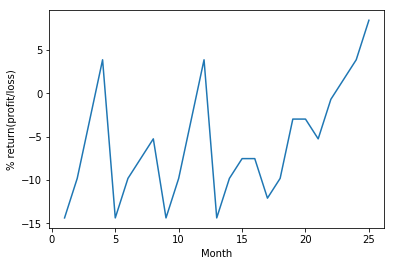

In [16]:
sns.lineplot(x="Month", y="% return(profit/loss)", data=data)

 The return % increases as the time duration(month) of borrowing money increases

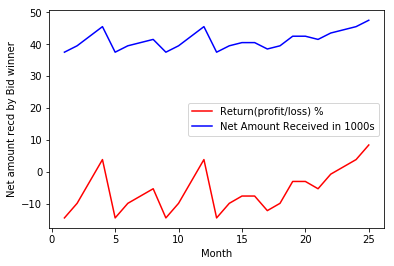

In [17]:
sns.lineplot(data["Month"], data["% return(profit/loss)"], color = 'red')
sns.lineplot(data["Month"], data["Net amount recd by Bid winner"]/1000, color = 'blue')
plt.legend(("Return(profit/loss) %", "Net Amount Received in 1000s"))

Return % is related with net amount receive